## Cross-Asset Dynamics, FX Sensitivity, Volume Paterns & Light Risk Profiling

Test areas include:
    -   Data cleaning discipline
    -   Returns engineering
    -   Statistical descriptives
    -   Correlation & dependency work
    -   Rolling measures
    -   FX sensitivity
    -   Distribution understanding
    -   Light risk metrics
    -   Clean written conclusions
    -   Ability to extract insights under time pressure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


In [39]:
# PART A - DATA HYGIENE

cross_asset_data = pd.read_csv("cross_asset_data.csv")
cross_asset_data['Date'] = pd.to_datetime(cross_asset_data['Date'])
cross_asset_data = cross_asset_data.set_index('Date')
cross_asset_df = cross_asset_data.ffill().bfill().drop_duplicates()
print(cross_asset_df.head(5))

            Equity_Price  Equity_Volume  Bond_Price  Bond_Yield  FX_USDGBP  \
Date                                                                         
2024-01-02          4125       42000000       98.50        3.55      1.267   
2024-01-03          4152       41500000       98.30        3.58      1.264   
2024-01-04          4098       52500000       98.15        3.62      1.269   
2024-01-05          4082       54000000       98.22        3.60      1.271   
2024-01-08          4111       50000000       98.35        3.57      1.266   

            Oil_Price  Gold_Price  
Date                               
2024-01-02       72.3        1845  
2024-01-03       73.1        1848  
2024-01-04       72.8        1839  
2024-01-05       73.4        1842  
2024-01-08       74.0        1847  


- Data is generally clean
- No duplicates (dropped if needed)
- No NaN terms
- Utilised ffill().bfill() for cleanliness
- No extreme outliers

In [40]:
# PART B - Return Engineering

# Daily Returns

cross_asset_df['Equity_Log_Returns'] = np.log(cross_asset_df['Equity_Price'] / cross_asset_df['Equity_Price'].shift(1))
cross_asset_df['Bond_Price_Returns'] = np.log(cross_asset_df['Bond_Price'] / cross_asset_df['Bond_Price'].shift(1))
cross_asset_df['Oil_Returns'] = np.log(cross_asset_df['Oil_Price'] / cross_asset_df['Oil_Price'].shift(1))
cross_asset_df['Gold_Returns'] = np.log(cross_asset_df['Gold_Price'] / cross_asset_df['Gold_Price'].shift(1))
cross_asset_df['FX_%_Change'] = cross_asset_df['FX_USDGBP'].pct_change()
cross_asset_df = cross_asset_df.fillna(0.0)

# Excess Return vs FX

cross_asset_df['Excess_Equity_Returns'] = cross_asset_df['Equity_Log_Returns'] - cross_asset_df['FX_%_Change']
cross_asset_df['Excess_Bond_Returns'] = cross_asset_df['Bond_Price_Returns'] - cross_asset_df['FX_%_Change']
cross_asset_df['Excess_Oil_Returns'] = cross_asset_df['Oil_Returns'] - cross_asset_df['FX_%_Change']
cross_asset_df['Excess_Gold_Returns'] = cross_asset_df['Gold_Returns'] - cross_asset_df['FX_%_Change']

# Rolling Statistics

cross_asset_df['3_Day_Equity_Vol'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 3).std()
cross_asset_df['3_Day_Bond_Vol'] = cross_asset_df['Bond_Price_Returns'].rolling(window = 3).std()
cross_asset_df['3_Day_Oil_Vol'] = cross_asset_df['Oil_Returns'].rolling(window = 3).std()
cross_asset_df['3_Day_Gold_Vol'] = cross_asset_df['Gold_Returns'].rolling(window = 3).std()
cross_asset_df['3_Day_FX_Vol'] = cross_asset_df['FX_%_Change'].rolling(window = 3).std()

cross_asset_df['5_Day_Equity_Vol'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 5).std()
cross_asset_df['5_Day_Bond_Vol'] = cross_asset_df['Bond_Price_Returns'].rolling(window = 5).std()
cross_asset_df['5_Day_Oil_Vol'] = cross_asset_df['Oil_Returns'].rolling(window = 5).std()
cross_asset_df['5_Day_Gold_Vol'] = cross_asset_df['Gold_Returns'].rolling(window = 5).std()
cross_asset_df['5_Day_FX_Vol'] = cross_asset_df['FX_%_Change'].rolling(window = 5).std()

cross_asset_df['3_Day_Equity_Mean'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 3).mean()
cross_asset_df['3_Day_Bond_Mean'] = cross_asset_df['Bond_Price_Returns'].rolling(window = 3).mean()
cross_asset_df['3_Day_Oil_Mean'] = cross_asset_df['Oil_Returns'].rolling(window = 3).mean()
cross_asset_df['3_Day_Gold_Mean'] = cross_asset_df['Gold_Returns'].rolling(window = 3).mean()
cross_asset_df['3_Day_FX_Mean'] = cross_asset_df['FX_%_Change'].rolling(window = 3).mean()

cross_asset_df['5_Day_Equity_Mean'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 5).mean()
cross_asset_df['5_Day_Bond_Mean'] = cross_asset_df['Bond_Price_Returns'].rolling(window = 5).mean()
cross_asset_df['5_Day_Oil_Mean'] = cross_asset_df['Oil_Returns'].rolling(window = 5).mean()
cross_asset_df['5_Day_Gold_Mean'] = cross_asset_df['Gold_Returns'].rolling(window = 5).mean()
cross_asset_df['5_Day_FX_Mean'] = cross_asset_df['FX_%_Change'].rolling(window = 5).mean()

cross_asset_df['3_Day_Equity_Bond_Correlation'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 3).corr(cross_asset_df['Bond_Price_Returns'])
cross_asset_df['5_Day_Equity_Bond_Correlation'] = cross_asset_df['Equity_Log_Returns'].rolling(window = 5).corr(cross_asset_df['Bond_Price_Returns'])
cross_asset_df['3_Day_Oil_Gold_Correlation'] = cross_asset_df['Oil_Returns'].rolling(window = 3).corr(cross_asset_df['Gold_Returns'])
cross_asset_df['5_Day_Oil_Gold_Correlation'] = cross_asset_df['Oil_Returns'].rolling(window = 5).corr(cross_asset_df['Gold_Returns'])

cross_asset_df = cross_asset_df.fillna(0.0)
cross_asset_df

equities_df = [cross_asset_df['Equity_Log_Returns'], cross_asset_df['Excess_Equity_Returns'], cross_asset_df['3_Day_Equity_Vol'], cross_asset_df['5_Day_Equity_Vol'], cross_asset_df['3_Day_Equity_Mean'], cross_asset_df['5_Day_Equity_Mean'], cross_asset_df['3_Day_Equity_Bond_Correlation'], cross_asset_df['5_Day_Equity_Bond_Correlation']]
equities_df = pd.DataFrame(equities_df).transpose()

bond_df = [cross_asset_df['Bond_Price_Returns'], cross_asset_df['Excess_Bond_Returns'], cross_asset_df['3_Day_Bond_Vol'], cross_asset_df['5_Day_Bond_Vol'], cross_asset_df['3_Day_Bond_Mean'], cross_asset_df['5_Day_Bond_Mean'], cross_asset_df['3_Day_Equity_Bond_Correlation'], cross_asset_df['5_Day_Equity_Bond_Correlation']]
bond_df = pd.DataFrame(bond_df).transpose()

oil_df = [cross_asset_df['Oil_Returns'], cross_asset_df['Excess_Oil_Returns'], cross_asset_df['3_Day_Oil_Vol'], cross_asset_df['5_Day_Oil_Vol'], cross_asset_df['3_Day_Oil_Mean'], cross_asset_df['5_Day_Oil_Mean'], cross_asset_df['3_Day_Oil_Gold_Correlation'], cross_asset_df['5_Day_Oil_Gold_Correlation']]
oil_df = pd.DataFrame(oil_df).transpose()

gold_df = [cross_asset_df['Gold_Returns'], cross_asset_df['Excess_Gold_Returns'], cross_asset_df['3_Day_Gold_Vol'], cross_asset_df['5_Day_Gold_Vol'], cross_asset_df['3_Day_Gold_Mean'], cross_asset_df['5_Day_Gold_Mean'], cross_asset_df['3_Day_Oil_Gold_Correlation'], cross_asset_df['5_Day_Oil_Gold_Correlation']]
gold_df = pd.DataFrame(gold_df).transpose()

print(equities_df.head())
print(bond_df.head())
print(oil_df.head())
print(gold_df.head())

            Equity_Log_Returns  Excess_Equity_Returns  3_Day_Equity_Vol  \
Date                                                                      
2024-01-02            0.000000               0.000000          0.000000   
2024-01-03            0.006524               0.008892          0.000000   
2024-01-04           -0.013091              -0.017047          0.009989   
2024-01-05           -0.003912              -0.005488          0.009814   
2024-01-08            0.007079               0.011013          0.010099   

            5_Day_Equity_Vol  3_Day_Equity_Mean  5_Day_Equity_Mean  \
Date                                                                 
2024-01-02          0.000000           0.000000            0.00000   
2024-01-03          0.000000           0.000000            0.00000   
2024-01-04          0.000000          -0.002189            0.00000   
2024-01-05          0.000000          -0.003493            0.00000   
2024-01-08          0.008322          -0.003308       

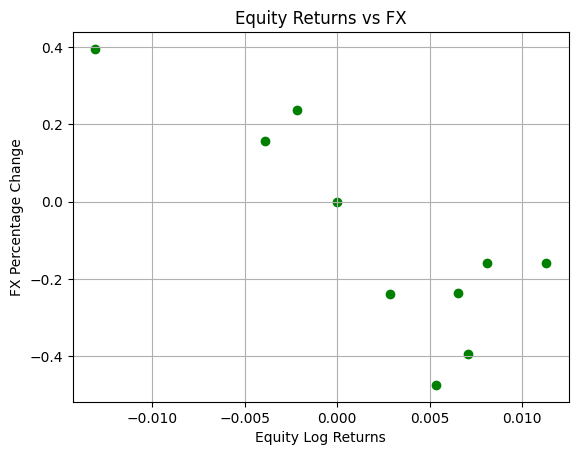

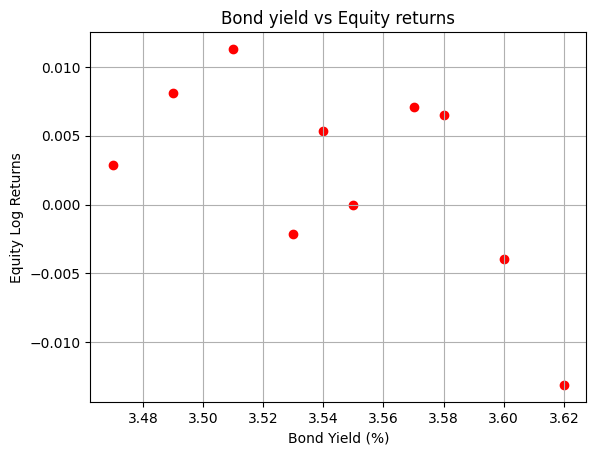

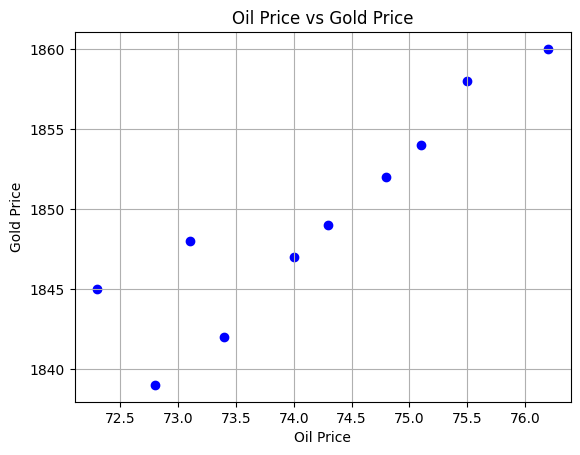

In [ ]:
# PART C - CROSS-ASSET CORRELATION ANALYSIS

all_returns = pd.concat([
    cross_asset_df['Equity_Log_Returns'],
    cross_asset_df['Bond_Price_Returns'],
    cross_asset_df['Oil_Price'],
    cross_asset_df['Gold_Returns'],
], axis = 1)

all_returns.columns = ['Equity_Log_Returns', 'Bond_Price_Returns', 'Oil_Price', 'Gold_Returns']
full_corr_matrix = all_returns.corr()
full_corr_matrix

plt.Figure(figsize= (5, 2.5))
plt.scatter(x = cross_asset_df['Equity_Log_Returns'], y = cross_asset_df['FX_%_Change'] * 100, color = 'g');
plt.xlabel('Equity Log Returns');
plt.ylabel(f'FX Percentage Change');
plt.title("Equity Returns vs FX");
plt.grid(True);
plt.show();

plt.Figure(figsize = (5, 2.5))
plt.scatter(x = cross_asset_df['Bond_Yield'], y = cross_asset_df['Equity_Log_Returns'], color = 'r');
plt.xlabel('Bond Yield (%)');
plt.ylabel(f'Equity Log Returns');
plt.title("Bond yield vs Equity returns");
plt.grid(True);
plt.show();

plt.Figure(figsize = (5, 2.5))
plt.scatter(x = cross_asset_df['Oil_Price'], y = cross_asset_df['Gold_Price'], color = 'b');
plt.xlabel('Oil Price');
plt.ylabel(f'Gold Price');
plt.title("Oil Price vs Gold Price");
plt.grid(True);
plt.show();


-   Notice that there are no negatively correlated assets (which is a good thing)
-   By definition, diversification is investing in non-perfectly coreelated assets.
-   Strongest relationships are between Equity and Gold Returns (0.890217), which is interesting because you gold is a safe haven asset, and equities are risky.
-   Weakest relationships are between Oil and Equities (0.485629), which is in line with expectations. Oil is a more volatile asset, and very dependent on geopolitics, whereas equities are more corporates facing.

In [105]:
# PART C - CROSS-ASSET CORRELATION ANALYSIS (PART 2)

mid_point = len(all_returns) // 2
first_half = all_returns.iloc[:mid_point]
second_half = all_returns.iloc[mid_point:]

corr_first_half = first_half.corr()
corr_second_half = second_half.corr()

print("Correlation Matrix (First Half):\n\n", corr_first_half.values, "\n")
print("Correlation Matrix (Second Half):\n\n", corr_second_half.values, "\n")

Correlation Matrix (First Half):

 [[1.         0.25653674 0.4328667  0.87879385]
 [0.25653674 1.         0.51630448 0.53361774]
 [0.4328667  0.51630448 1.         0.56911038]
 [0.87879385 0.53361774 0.56911038 1.        ]] 

Correlation Matrix (Second Half):

 [[1.         0.92771753 0.04892044 0.93003554]
 [0.92771753 1.         0.16074089 0.87548538]
 [0.04892044 0.16074089 1.         0.28288684]
 [0.93003554 0.87548538 0.28288684 1.        ]] 



FX SENSITIVITY ANALYSIS (Beta to FX Changes)

EQUITY:
  β (slope):     -2.128590
  α (intercept): 0.000358
  R²:            0.686245
  p-value:       3.066933e-03

BOND:
  β (slope):     -0.283987
  α (intercept): 0.000159
  R²:            0.299511
  p-value:       1.015567e-01

OIL:
  β (slope):     -1.393424
  α (intercept): 0.004044
  R²:            0.435268
  p-value:       3.792514e-02

GOLD:
  β (slope):     -0.622461
  α (intercept): 0.000269
  R²:            0.534112
  p-value:       1.634788e-02


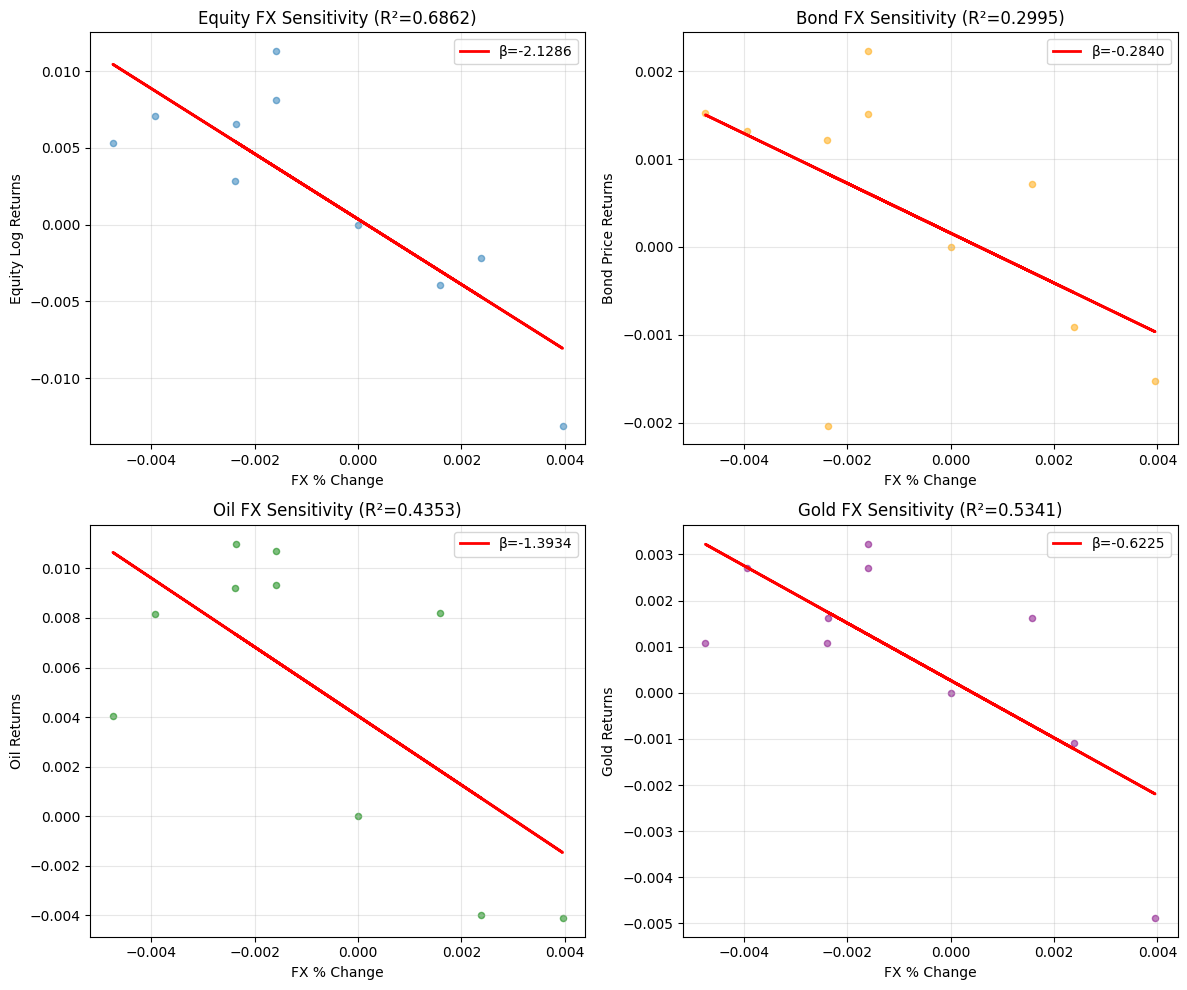

In [111]:
# PART D - FX Sensitivty Analysis

eq_slope, eq_intercept, eq_r, eq_p, eq_se = linregress(
    cross_asset_df['FX_%_Change'],
    cross_asset_df['Equity_Log_Returns']
)

bond_slope, bond_intercept, bond_r, bond_p, bond_se = linregress(
    cross_asset_df['FX_%_Change'],
    cross_asset_df['Bond_Price_Returns']
)

oil_slope, oil_intercept, oil_r, oil_p, oil_se = linregress(
    cross_asset_df['FX_%_Change'],
    cross_asset_df['Oil_Returns']
)

gold_slope, gold_intercept, gold_r, gold_p, gold_se = linregress(
    cross_asset_df['FX_%_Change'],
    cross_asset_df['Gold_Returns']
)

# Display results
print("=" * 60)
print("FX SENSITIVITY ANALYSIS (Beta to FX Changes)")
print("=" * 60)
print(f"\nEQUITY:")
print(f"  β (slope):     {eq_slope:.6f}")
print(f"  α (intercept): {eq_intercept:.6f}")
print(f"  R²:            {eq_r**2:.6f}")
print(f"  p-value:       {eq_p:.6e}")

print(f"\nBOND:")
print(f"  β (slope):     {bond_slope:.6f}")
print(f"  α (intercept): {bond_intercept:.6f}")
print(f"  R²:            {bond_r**2:.6f}")
print(f"  p-value:       {bond_p:.6e}")

print(f"\nOIL:")
print(f"  β (slope):     {oil_slope:.6f}")
print(f"  α (intercept): {oil_intercept:.6f}")
print(f"  R²:            {oil_r**2:.6f}")
print(f"  p-value:       {oil_p:.6e}")

print(f"\nGOLD:")
print(f"  β (slope):     {gold_slope:.6f}")
print(f"  α (intercept): {gold_intercept:.6f}")
print(f"  R²:            {gold_r**2:.6f}")
print(f"  p-value:       {gold_p:.6e}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Equity
axes[0, 0].scatter(cross_asset_df['FX_%_Change'], cross_asset_df['Equity_Log_Returns'], alpha=0.5, s=20)
axes[0, 0].plot(cross_asset_df['FX_%_Change'], eq_intercept + eq_slope * cross_asset_df['FX_%_Change'], 'r-', linewidth=2, label=f'β={eq_slope:.4f}')
axes[0, 0].set_xlabel('FX % Change')
axes[0, 0].set_ylabel('Equity Log Returns')
axes[0, 0].set_title(f'Equity FX Sensitivity (R²={eq_r**2:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Bond
axes[0, 1].scatter(cross_asset_df['FX_%_Change'], cross_asset_df['Bond_Price_Returns'], alpha=0.5, s=20, color='orange')
axes[0, 1].plot(cross_asset_df['FX_%_Change'], bond_intercept + bond_slope * cross_asset_df['FX_%_Change'], 'r-', linewidth=2, label=f'β={bond_slope:.4f}')
axes[0, 1].set_xlabel('FX % Change')
axes[0, 1].set_ylabel('Bond Price Returns')
axes[0, 1].set_title(f'Bond FX Sensitivity (R²={bond_r**2:.4f})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Oil
axes[1, 0].scatter(cross_asset_df['FX_%_Change'], cross_asset_df['Oil_Returns'], alpha=0.5, s=20, color='green')
axes[1, 0].plot(cross_asset_df['FX_%_Change'], oil_intercept + oil_slope * cross_asset_df['FX_%_Change'], 'r-', linewidth=2, label=f'β={oil_slope:.4f}')
axes[1, 0].set_xlabel('FX % Change')
axes[1, 0].set_ylabel('Oil Returns')
axes[1, 0].set_title(f'Oil FX Sensitivity (R²={oil_r**2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gold
axes[1, 1].scatter(cross_asset_df['FX_%_Change'], cross_asset_df['Gold_Returns'], alpha=0.5, s=20, color='purple')
axes[1, 1].plot(cross_asset_df['FX_%_Change'], gold_intercept + gold_slope * cross_asset_df['FX_%_Change'], 'r-', linewidth=2, label=f'β={gold_slope:.4f}')
axes[1, 1].set_xlabel('FX % Change')
axes[1, 1].set_ylabel('Gold Returns')
axes[1, 1].set_title(f'Gold FX Sensitivity (R²={gold_r**2:.4f})')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Volume column: Equity_Volume  |  top-20% threshold = 51300000.0000

High-volume days (top 20%) — sample:
            Equity_Volume  Equity_Log_Returns  3_Day_Equity_Vol
Date                                                           
2024-01-04       52500000           -0.013091          0.009989
2024-01-05       54000000           -0.003912          0.009814

Summary (high vs normal):
               mean_return  mean_3d_vol
high_volume      -0.008502     0.009902
normal_volume     0.004883     0.004749


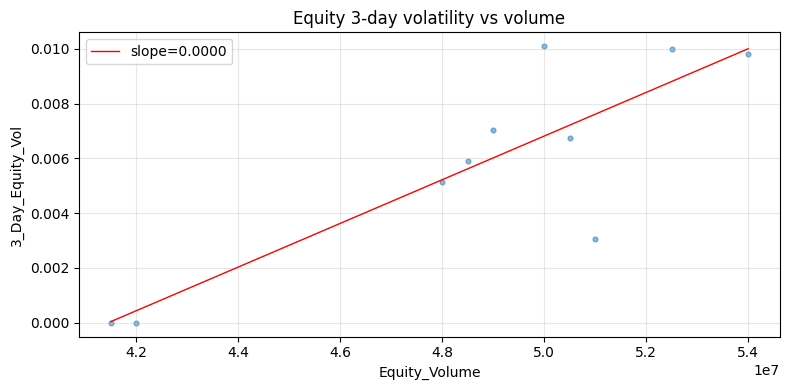

In [122]:
# PART E - VOLUME DYNAMICS & VOLATILITY

thr = cross_asset_df['Equity_Volume'].quantile(0.8)
high = cross_asset_df[cross_asset_df['Equity_Volume'] >= thr]
normal = cross_asset_df[cross_asset_df['Equity_Volume'] < thr]

print(f"Volume column: {'Equity_Volume'}  |  top-20% threshold = {thr:.4f}\n")
print("High-volume days (top 20%) — sample:")
print(high[['Equity_Volume', 'Equity_Log_Returns', '3_Day_Equity_Vol']].head(20).to_string())

summary = pd.DataFrame({
    'mean_return': [high['Equity_Log_Returns'].mean(), normal['Equity_Log_Returns'].mean()],
    'mean_3d_vol': [high['3_Day_Equity_Vol'].mean(), normal['3_Day_Equity_Vol'].mean()],
}, index=['high_volume', 'normal_volume'])
print("\nSummary (high vs normal):")
print(summary)

plt.figure(figsize=(8,4))
x = cross_asset_df['Equity_Volume'].dropna()
y = cross_asset_df['3_Day_Equity_Vol'].reindex(x.index).dropna()
common_idx = x.index.intersection(y.index)
x = x.loc[common_idx]; y = y.loc[common_idx]
plt.scatter(x, y, s=12, alpha=0.5)
if len(x) > 1:
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b, color='red', linewidth=1, label=f'slope={m:.4f}')
    plt.legend()
plt.xlabel('Equity_Volume'); plt.ylabel('3_Day_Equity_Vol')
plt.title('Equity 3-day volatility vs volume')
plt.grid(alpha=0.3); 
plt.tight_layout(); 
plt.show();



Skewness & Kurtosis
        skewness  pearson_kurtosis
asset                             
Equity -0.853914          3.025896
Bond   -0.529294          1.875567
Oil    -0.696468          1.863212
Gold   -1.405077          4.292520

Historical VaR (95% & 99%) — losses as positive numbers
          VaR_95    VaR_99
asset                     
Equity  0.008960  0.012265
Oil     0.004063  0.004103


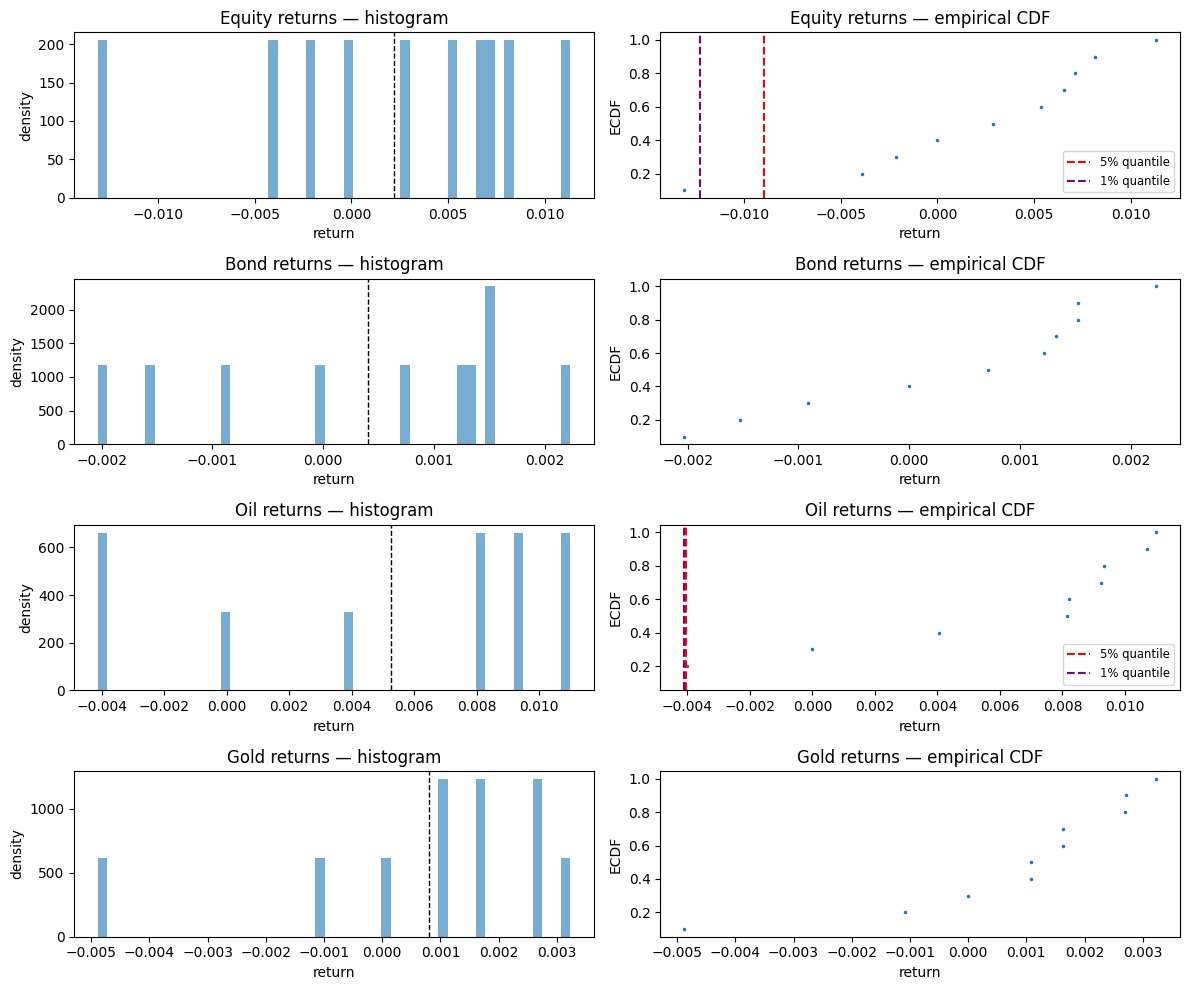

In [ ]:
# PART F - DISTRIBUTION ANALYSIS

from scipy.stats import skew, kurtosis

assets = {
    'Equity': 'Equity_Log_Returns',
    'Bond':   'Bond_Price_Returns',
    'Oil':    'Oil_Returns',
    'Gold':   'Gold_Returns'
}


skew_kurt = []
for name, col in assets.items():
    s = cross_asset_df[col].dropna()
    skew_val = skew(s)
    kurt_pears = kurtosis(s, fisher=False)  
    skew_kurt.append((name, skew_val, kurt_pears))

skew_kurt_df = pd.DataFrame(skew_kurt, columns=['asset', 'skewness', 'pearson_kurtosis']).set_index('asset')
print("Skewness & Kurtosis")
print(skew_kurt_df)

var_rows = []
for name in ['Equity','Oil']:
    col = assets[name]
    s = cross_asset_df[col].dropna()
    var95 = -np.percentile(s, 5)   # 95% Historical VaR (loss)
    var99 = -np.percentile(s, 1)   # 99% Historical VaR
    var_rows.append((name, var95, var99))

var_df = pd.DataFrame(var_rows, columns=['asset','VaR_95','VaR_99']).set_index('asset')
print("\nHistorical VaR (95% & 99%) — losses as positive numbers")
print(var_df)

fig, axes = plt.subplots(len(assets), 2, figsize=(12, 10))
for i, (name, col) in enumerate(assets.items()):
    s = cross_asset_df[col].dropna()

    # Histogram
    axes[i,0].hist(s, bins=50, density=True, alpha=0.6, color='C0')
    axes[i,0].axvline(s.mean(), color='k', linestyle='--', linewidth=1)
    axes[i,0].set_title(f"{name} returns — histogram")
    axes[i,0].set_xlabel('return'); axes[i,0].set_ylabel('density')

    # ECDF
    sorted_s = np.sort(s)
    ecdf = np.arange(1, len(sorted_s)+1) / len(sorted_s)
    axes[i,1].plot(sorted_s, ecdf, marker='.', linestyle='none', markersize=3)
    axes[i,1].set_title(f"{name} returns — empirical CDF")
    axes[i,1].set_xlabel('return'); axes[i,1].set_ylabel('ECDF')

    # annotate VaR lines for Equity and Oil
    if name in var_df.index:
        axes[i,1].axvline(-var_df.loc[name,'VaR_95'], color='red', linestyle='--', label='5% quantile')
        axes[i,1].axvline(-var_df.loc[name,'VaR_99'], color='purple', linestyle='--', label='1% quantile')
        axes[i,1].legend(fontsize='small')
plt.tight_layout()
plt.show()

In [124]:
# PART G - LIGHT RISK PROFILING

assets = {
    'Equity': 'Equity_Log_Returns',
    'Bond':   'Bond_Price_Returns',
    'Oil':    'Oil_Returns',
    'Gold':   'Gold_Returns'
}

rows = []
for name, col in assets.items():
    s = cross_asset_df[col].dropna()
    if s.empty:
        rows.append((name,)*9)
        continue

    mean_daily = s.mean()
    vol_daily = s.std(ddof=0)

    mean_ann = mean_daily * 252
    vol_ann = vol_daily * np.sqrt(252)

    sharpe_daily = mean_daily / vol_daily if vol_daily != 0 else np.nan
    sharpe_ann = mean_ann / vol_ann if vol_ann != 0 else np.nan

    wealth = np.exp(s.cumsum())        # starting wealth = 1
    cumulative_return = wealth.iloc[-1] - 1

    running_max = wealth.cummax()
    drawdown = (wealth / running_max) - 1
    max_drawdown = drawdown.min()      # negative number

    rows.append((
        name,
        mean_daily, vol_daily, sharpe_daily,
        mean_ann, vol_ann, sharpe_ann,
        cumulative_return, max_drawdown
    ))

cols = [
    'asset',
    'mean_daily', 'vol_daily', 'sharpe_daily',
    'mean_ann', 'vol_ann', 'sharpe_ann',
    'cumulative_return', 'max_drawdown'
]
risk_df = pd.DataFrame(rows, columns=cols).set_index('asset')

pd.options.display.float_format = '{:.6f}'.format
print("Risk table (daily + annualised):")
display(risk_df)

rank_df = risk_df.sort_values(by=['sharpe_ann', 'max_drawdown'], ascending=[False, False])
print("\nRanking (most -> least attractive for risk-averse investor):")
for i, (asset, r) in enumerate(rank_df.iterrows(), 1):
    print(f"{i}. {asset}  |  sharpe_ann={r.sharpe_ann:.4f}, vol_ann={r.vol_ann:.4f}, max_dd={r.max_drawdown:.4f}, cum_ret={r.cumulative_return:.4f}")



Risk table (daily + annualised):


,mean_daily,vol_daily,sharpe_daily,mean_ann,vol_ann,sharpe_ann,cumulative_return,max_drawdown
asset,,,,,,,,
Equity,0.002206,0.006824,0.323219,0.555860,0.108335,5.130949,0.022303,-0.016859
Bond,0.000405,0.001378,0.294061,0.102128,0.021878,4.668066,0.004061,-0.003553
Oil,0.005254,0.005609,0.936586,1.323941,0.089047,14.867844,0.053942,-0.004104
Gold,0.000810,0.002262,0.357951,0.204050,0.035910,5.682298,0.008130,-0.004870



Ranking (most -> least attractive for risk-averse investor):
1. Oil  |  sharpe_ann=14.8678, vol_ann=0.0890, max_dd=-0.0041, cum_ret=0.0539
2. Gold  |  sharpe_ann=5.6823, vol_ann=0.0359, max_dd=-0.0049, cum_ret=0.0081
3. Equity  |  sharpe_ann=5.1309, vol_ann=0.1083, max_dd=-0.0169, cum_ret=0.0223
4. Bond  |  sharpe_ann=4.6681, vol_ann=0.0219, max_dd=-0.0036, cum_ret=0.0041
